In [1]:
'''This code needs to take the Image_CAS_gini_M20 output (which includes r_e)
as well as the output from the Summit velocity maps and make an input to kinemetry
with a hexagonal mask'''


'This code needs to take the Image_CAS_gini_M20 output (which includes r_e)\nas well as the output from the Summit velocity maps and make an input to kinemetry\nwith a hexagonal mask'

In [42]:
import os
import pyfits
import numpy as np
import matplotlib.pyplot as plt

from astropy.cosmology import WMAP9 as cosmo
print(os.getcwd())

/Volumes/My Passport for Mac/LAURA_Sims/q0.5_fg0.3_allrx10_sunruns/hirestest_kin/Figs


In [43]:

#os.chdir(os.path.expanduser('/Volumes/My Passport For Mac/LAURA_SIMS'))
view=0
output_number=200

output='GALFIT_folder/out_'+str(view)+'_'+str(output_number)+'.fits'
out=pyfits.open(output)
r_e=out[2].header['1_RE']
#print(out[2].header)
print(float(r_e[0:5]))

'''also figure out where hte center is'''
print(out[2].header['1_XC'])
print(out[2].header['1_YC'])


'''But this effective radius is in pixels, so how do we convert it to arcsec?'''
redshift=0.03
kpc_arcmin=cosmo.kpc_proper_per_arcmin(redshift)#insert the redshift  
    #print(kpc_arcmin.value/60, 'kpc per arcsec')
'''Divide the pixelscale (kpc) by kpc/arcsec to get arcsec
    size of pixels'''
image='q0.5_fg0.3_allrx10/broadband_'+str(output_number)+'.fits'
im=pyfits.open(image)
pixelscale =  im['CAMERA'+str(view)+'-BROADBAND'].header['CD1_1']
size_a=pixelscale/(kpc_arcmin.value/60)
print('size of a pixel in arcsec', size_a)
print('2*r_e in arcsec',1.5*2*float(r_e[0:5])*size_a)
arcs_totes=1.5*2*float(r_e[0:5])*size_a
#kinemetry_input_append_x.txt

FileNotFoundError: [Errno 2] No such file or directory: 'GALFIT_folder/out_0_200.fits'

In [44]:
if arcs_totes > 32.5:
    n_fibers=127
    dia = 32.5
else:
    if arcs_totes > 27.5:
        n_fibers=91
        dia = 27.5
    else:
        if arcs_totes > 22.5:
            n_fibers=61
            dia=22.5
        else:
            if arcs_totes > 17.5:
                n_fibers=37
                dia=17.5
            else:
                n_fibers=19
                dia = 12.5
print(n_fibers,'fibers', 'diameter', dia)

61 fibers diameter 22.5


In [52]:
'''extract a square around the center of the velocity map'''
print(os.getcwd())
os.chdir(os.path.expanduser('/Volumes/My Passport for Mac/LAURA_Sims/q0.5_fg0.3_allrx10_sunruns/hirestest_kin/Figs')) # path to the simulated images
print(os.getcwd())
old_kin='kinemetry_input_append_51.txt'
size=53

/Volumes/My Passport for Mac/LAURA_Sims/q0.5_fg0.3_allrx10_sunruns/hirestest_kin/Figs
/Volumes/My Passport for Mac/LAURA_Sims/q0.5_fg0.3_allrx10_sunruns/hirestest_kin/Figs


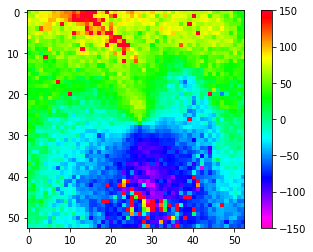

In [61]:
with open(old_kin, 'r') as f:
    data = f.readlines()
    #print(data)
    stel_vel=np.zeros((size,size))
    stel_vel_e=np.zeros((size,size))
    stel_disp=np.zeros((size,size))
    stel_disp_e=np.zeros((size,size))


    for line in data:
        words = line.split()

        if (words[0]) != 'Beginning':


            xs=int(round(float(words[0]),0))
            ys=int(round(float(words[1]),0))

            '''if float(words[2]) != 0 and float(words[4]) != 0:

                if abs(float(words[3])/float(words[2])) < 10 and abs(float(words[5])/float(words[4])) < 10:
                 '''   
            if float(words[2]) !=0:

                #if float(words[3]) > 0.1:#abs(float(words[3])/float(words[2])) < 0.2:
                stel_vel[xs,ys] = float(words[2])
                stel_vel_e[xs,ys] = float(words[3])

                stel_disp[xs,ys] = float(words[4])
                stel_disp_e[xs,ys] = float(words[5])
                '''else:
                    stel_vel[xs,ys] = 0
                    stel_vel_e[xs,ys] = 0

                    stel_disp[xs,ys] = 0
                    stel_disp_e[xs,ys] = 0'''
            else:
                stel_vel[xs,ys] = 0
                stel_vel_e[xs,ys] = 0

                stel_disp[xs,ys] = 0
                stel_disp_e[xs,ys] = 0
plt.imshow(np.flipud(np.rot90(stel_vel)), vmin=-150, vmax=150, cmap='gist_rainbow_r')
plt.colorbar()
plt.show()

cen_x=size/2


In [ ]:
def new_kinemetry(masked, masked_e, masked_d, masked_d_e, middle_x, middle_y):
    
    os.chdir(os.path.expanduser('~/Documents/LAURA_Sims/'))

    file2=open('kinemetry_input/kinemetry_masked.txt','w')
    file2.write('#'+'\t'+'XBIN'+'\t'+'YBIN'+'\t'+'VEL'+'\t'+'ER_VEL'+'\t'+'SIG'+'\t'+'ER_SIG'+'\n')
    
    
    counter=1
    for i in range(149):
        for j in range(149):
            if str(masked[i,j])== '--':
                continue
            else:
                file2.write(str(counter)+'\t'+str(i-middle_x)+'\t'+str(j-middle_y)+'\t')
                file2.write(str(round(masked[i,j],2))+'\t'+str(round(masked_e[i,j],2))+'\t'+str(round(masked_d[i,j],2))+'\t'+str(round(masked_d_e[i,j],2))+'\n')
                #print(counter, i, j, masked[i,j])
                counter +=1
                
    file2.close()